In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [26]:
data = pd.read_csv("MNIST.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#data processing into 2D arrays
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

#validation data
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255 #normalize to range [0,1]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

In [28]:
def init_params():
    #initialize weights and biases from standard normal distribution
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z) #deals with vanishing gradient

def ReLU_deriv(Z):
    return Z > 0 #used in backpropagation

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z)) #turns values into probability distribution

def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot_transform(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1 #set the value corresponding with the label to 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot_transform(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [29]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [30]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[7 7 3 ... 1 3 0] [5 1 7 ... 9 2 3]
0.0996829268292683
Iteration:  10
[9 8 3 ... 8 3 0] [5 1 7 ... 9 2 3]
0.1581219512195122
Iteration:  20
[9 8 3 ... 8 3 5] [5 1 7 ... 9 2 3]
0.2038292682926829
Iteration:  30
[9 8 2 ... 8 3 3] [5 1 7 ... 9 2 3]
0.2581219512195122
Iteration:  40
[9 0 2 ... 1 3 3] [5 1 7 ... 9 2 3]
0.32009756097560976
Iteration:  50
[9 0 9 ... 9 3 3] [5 1 7 ... 9 2 3]
0.37085365853658536
Iteration:  60
[9 0 9 ... 9 3 3] [5 1 7 ... 9 2 3]
0.4068780487804878
Iteration:  70
[9 0 9 ... 9 3 5] [5 1 7 ... 9 2 3]
0.44421951219512196
Iteration:  80
[9 0 7 ... 9 3 5] [5 1 7 ... 9 2 3]
0.4878292682926829
Iteration:  90
[9 0 7 ... 9 3 5] [5 1 7 ... 9 2 3]
0.5280487804878049
Iteration:  100
[9 0 7 ... 9 3 5] [5 1 7 ... 9 2 3]
0.5642682926829268
Iteration:  110
[9 0 7 ... 9 3 5] [5 1 7 ... 9 2 3]
0.5995365853658536
Iteration:  120
[9 0 7 ... 9 2 5] [5 1 7 ... 9 2 3]
0.6312439024390244
Iteration:  130
[9 0 7 ... 9 2 5] [5 1 7 ... 9 2 3]
0.6595121951219513
Iteration:  14

In [31]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  5


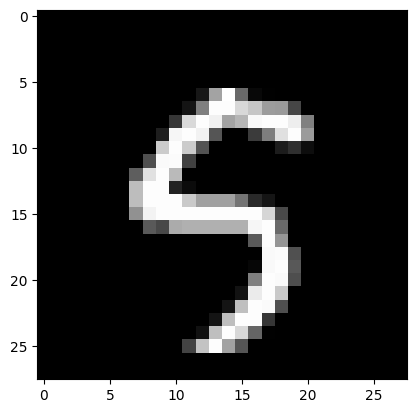

Prediction:  [5]
Label:  1


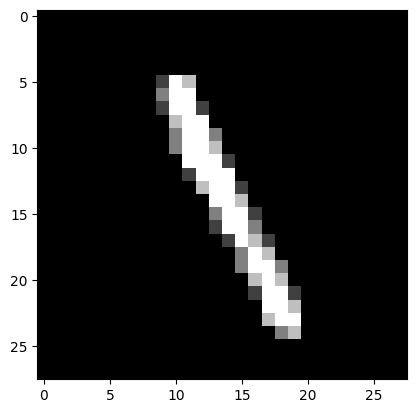

Prediction:  [7]
Label:  7


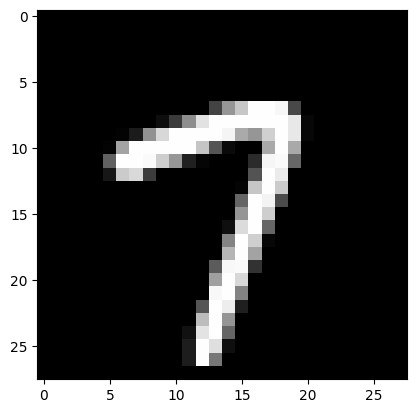

Prediction:  [9]
Label:  9


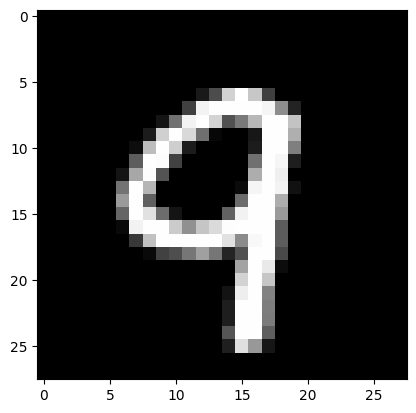

In [32]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [33]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 9 9 9 0 8 4 9 4 4 0 9 7 2 1 9 5 1 4 1 0 0 8 9 6 2 9 1 3 1 9 7 6 2 2 1 7
 2 8 7 2 1 7 3 5 9 2 2 6 1 1 9 3 2 1 0 5 3 0 8 6 1 4 6 3 5 1 3 9 1 9 4 6 8
 0 6 7 0 4 8 4 7 9 5 4 9 8 3 4 0 8 7 7 5 4 9 2 5 5 0 2 7 0 4 4 7 6 8 6 5 2
 0 9 8 4 8 8 0 7 2 8 8 1 6 2 3 6 0 7 4 0 6 5 2 1 4 5 3 7 0 7 9 7 8 0 4 3 3
 0 3 1 5 7 1 9 5 0 9 1 7 2 1 1 4 2 8 7 1 9 0 1 0 5 6 2 7 9 4 3 4 9 1 1 8 4
 7 8 7 6 8 2 1 6 6 2 1 3 4 3 7 6 5 0 7 4 5 0 6 9 6 9 0 3 7 9 4 2 0 3 4 2 3
 4 3 8 2 3 5 8 3 0 3 1 9 0 0 4 2 0 0 8 3 1 2 1 8 6 8 8 0 4 5 9 4 9 4 0 1 9
 3 2 3 3 7 3 0 7 3 2 2 4 9 6 1 5 7 3 0 1 7 3 5 1 8 2 7 9 8 2 9 4 1 5 7 7 7
 6 0 4 2 7 3 5 5 7 8 9 5 0 1 8 7 0 0 4 0 8 9 2 3 7 7 8 1 8 0 7 9 5 4 4 1 8
 7 7 1 9 1 0 1 6 9 8 6 8 2 8 1 4 4 2 8 8 6 6 6 2 8 2 7 7 3 6 4 0 3 1 5 6 4
 0 8 8 6 6 1 4 6 2 2 8 6 8 5 6 0 0 5 5 0 5 5 1 2 4 3 7 9 5 2 3 1 4 1 4 7 3
 1 9 4 8 1 6 2 5 2 6 1 6 0 7 9 4 7 3 2 5 8 5 9 7 6 8 0 2 0 5 6 6 3 3 6 3 5
 7 0 8 9 3 4 1 1 1 4 2 8 9 9 8 9 2 4 1 7 7 7 6 9 2 8 9 1 8 1 9 1 7 4 6 6 4
 6 6 5 5 3 1 5 4 1 9 3 6 

0.836